# Salary Prediction

*Data consists of tenure of colleague and salary*

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [3]:
# importing data using pandas dataframe
df = pd.read_csv("C:\\Users\\sunta\\OneDrive\\Desktop\\data\\linearRegression\\Salary_Data.csv")

In [6]:
# describe
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Salary'>

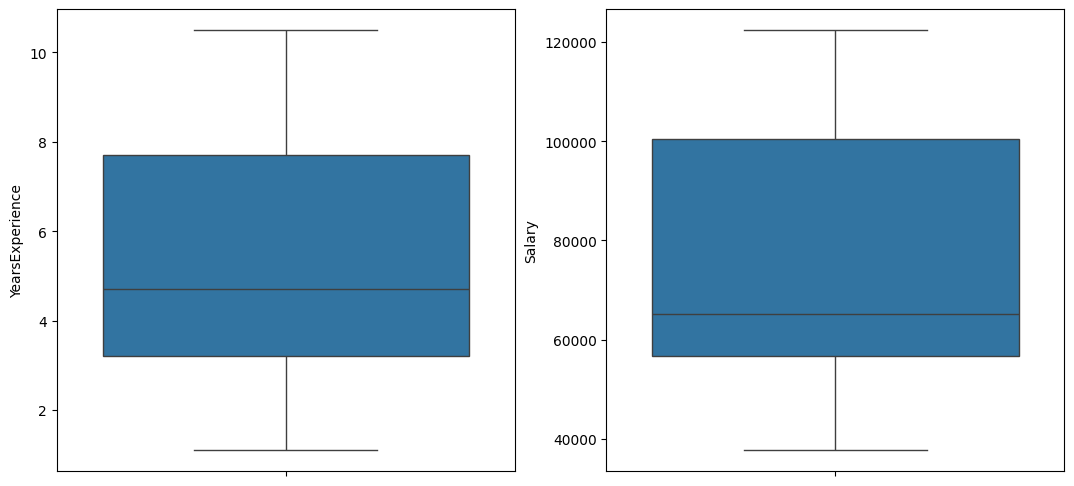

In [20]:
fg, axs = plt.subplots(1,2, figsize=(13,6))

sns.boxplot(df['YearsExperience'], ax=axs[0])
sns.boxplot(df['Salary'], ax=axs[1])

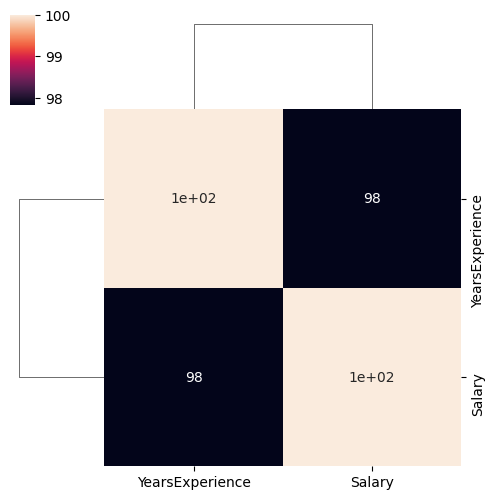

In [25]:
sns.clustermap(df.corr(method='pearson')*100,annot=True, figsize=(5,5))
# 98% correlated, which is good

<Axes: xlabel='YearsExperience', ylabel='Salary'>

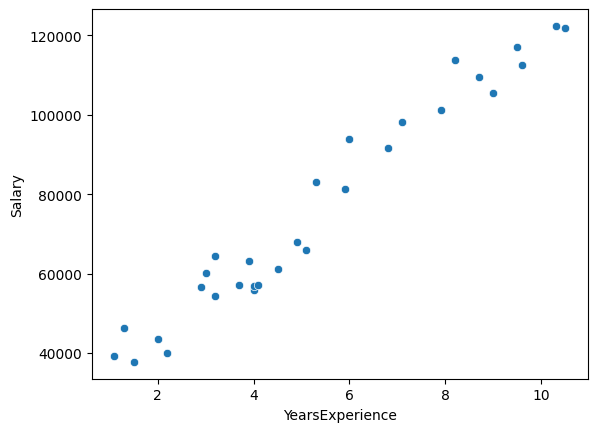

In [32]:
sns.scatterplot(df, x=df['YearsExperience'],y=df['Salary'])

In [28]:
X = df['YearsExperience']
y= df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2)

In [39]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     426.5
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           6.80e-16
Time:                        21:36:08   Log-Likelihood:                -241.25
No. Observations:                  24   AIC:                             486.5
Df Residuals:                      22   BIC:                             488.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.495e+04   2929.404     

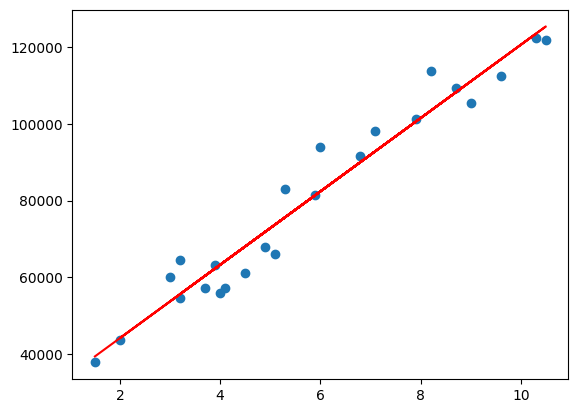

In [40]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 9575*X_train+24950, 'r')

In [44]:
y_train_pred = lr.predict(X_train_sm)
res = y_train_pred - y_train